# Introduction

Road traffic accidents are ranked 9th in the leading cause of death, accounting for 2.2% of all deaths globally. According to World Health Organisation(WHO)'s infographic on road safety, approximately 1.25 million people died from road accident each year, amounting to 3287 deaths per day. Additionally, approximately 20 to 50 million people are physically impaired after the accident.

## Objective of analysis
- Determine the profile for a typical road traffic accidents and identify key variables that resulted in an accident 
- We will be looking into the following variables:
 * state_name
 * day_of_week
 * month_of_crash
 * hour_of_crash
 * consecutive_number (unique case number assigned to each crash, used as count)
 * number_of_fatalities


### Importing required packages

In [78]:
# Importing packages
import bq_helper as bqh # Simplifies common read-only tasks in BigQuery by dealing with object references and unpacking result objects into pandas dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding bq_helper
- bq_helper uses the creation of one BigQueryHelper object per dataset.
- Two aguments have to be filled:
    * The name of the BigQuery project, which on Kaggle should always be bigquery-public-data. As we are using Kaggle, we do not need to deal with configurations. However, if you need to run it on your local machine, you can check out the [Readme](https://github.com/SohierDane/BigQuery_Helper/blob/master/README.md) created by the author.
    * The name of the dataset, which can be found in the dataset description.

In [79]:
traffic_data = bqh.BigQueryHelper('bigquery-public-data','nhtsa_traffic_fatalities')

Using Kaggle's public dataset BigQuery integration.


### Let's look at the number of tables.


In [80]:
traffic_data.list_tables()

['accident_2015',
 'accident_2016',
 'cevent_2015',
 'cevent_2016',
 'damage_2015',
 'damage_2016',
 'distract_2015',
 'distract_2016',
 'drimpair_2015',
 'drimpair_2016',
 'factor_2015',
 'factor_2016',
 'maneuver_2015',
 'maneuver_2016',
 'nmcrash_2015',
 'nmcrash_2016',
 'nmimpair_2015',
 'nmimpair_2016',
 'nmprior_2015',
 'nmprior_2016',
 'parkwork_2015',
 'parkwork_2016',
 'pbtype_2015',
 'pbtype_2016',
 'person_2015',
 'person_2016',
 'safetyeq_2015',
 'safetyeq_2016',
 'vehicle_2015',
 'vehicle_2016',
 'vevent_2015',
 'vevent_2016',
 'vindecode_2015',
 'vindecode_2016',
 'violatn_2015',
 'violatn_2016',
 'vision_2015',
 'vision_2016',
 'vsoe_2015',
 'vsoe_2016']

- We will be specifically working on the table- 'accident_2015'.

### Before we work on the queries, we will need to check how much memory it will use. Kaggle will only allow up to 5 TB usage of memory per month and before we work on any large datasets, we need to make sure it does not make a huge dent in our resources. 

In [81]:
query = '''
SELECT state_name,
consecutive_number as case_id,
CASE
WHEN day_of_week = 1 THEN "Sunday"
WHEN day_of_week = 2 THEN "Monday"
WHEN day_of_week = 3 THEN "Tuesday"
WHEN day_of_week = 4 THEN "Wednesday"
WHEN day_of_week = 5 THEN "Thursday"
WHEN day_of_week = 6 THEN "Friday"
WHEN day_of_week = 7 THEN "Saturday"
ELSE "Unknown"
END day_of_week,
CASE
WHEN month_of_crash = 1 THEN 'Jan'
WHEN month_of_crash = 2 THEN 'Feb'
WHEN month_of_crash = 3 THEN 'Mar'
WHEN month_of_crash = 4 THEN 'Apr'
WHEN month_of_crash = 5 THEN 'May'
WHEN month_of_crash = 6 THEN 'Jun'
WHEN month_of_crash = 7 THEN 'Jul'
WHEN month_of_crash = 8 THEN 'Aug'
WHEN month_of_crash = 9 THEN 'Sep'
WHEN month_of_crash = 10 THEN 'Oct'
WHEN month_of_crash = 11 THEN 'Nov'
WHEN month_of_crash = 12 THEN 'Dec'
ELSE "Unknown"
END month_of_year,
CASE
WHEN hour_of_crash = 0 THEN '12AM'
WHEN hour_of_crash = 1 THEN '1AM'
WHEN hour_of_crash = 2 THEN '2AM'
WHEN hour_of_crash = 3 THEN '3AM'
WHEN hour_of_crash = 4 THEN '4AM'
WHEN hour_of_crash = 5 THEN '5AM'
WHEN hour_of_crash = 6 THEN '6AM'
WHEN hour_of_crash = 7 THEN '7AM'
WHEN hour_of_crash = 8 THEN '8AM'
WHEN hour_of_crash = 9 THEN '9AM'
WHEN hour_of_crash = 10 THEN '10AM'
WHEN hour_of_crash = 11 THEN '11AM'
WHEN hour_of_crash = 12 THEN '12PM'
WHEN hour_of_crash = 13 THEN '1PM'
WHEN hour_of_crash = 14 THEN '2PM'
WHEN hour_of_crash = 15 THEN '3PM'
WHEN hour_of_crash = 16 THEN '4PM'
WHEN hour_of_crash = 17 THEN '5PM'
WHEN hour_of_crash = 18 THEN '6PM'
WHEN hour_of_crash = 19 THEN '7PM'
WHEN hour_of_crash = 20 THEN '8PM'
WHEN hour_of_crash = 21 THEN '9PM'
WHEN hour_of_crash = 22 THEN '10PM'
WHEN hour_of_crash = 23 THEN '11PM'
ELSE "Unknown"
END hour_of_day,
number_of_fatalities as no_of_victims,
light_condition_name AS light_condition,
atmospheric_conditions_1_name AS atmospheric_condition,
from 
`bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
'''

traffic_data.estimate_query_size(query)

0.002193947322666645

- Looking good. Looks like we only use up 26 MB of data. Now we will give the data back as a Pandas Dataframe and preview the dataframe.

In [82]:
df = traffic_data.query_to_pandas(query)
df.head()

,state_name,case_id,day_of_week,month_of_year,hour_of_day,no_of_victims,light_condition,atmospheric_condition
0,Iowa,190001,Thursday,Jan,1AM,1,Dark – Not Lighted,Clear
1,Iowa,190244,Saturday,Nov,1AM,1,Dark – Lighted,Clear
2,Iowa,190075,Sunday,May,1AM,1,Dark – Not Lighted,Cloudy
3,Iowa,190014,Saturday,Jan,1AM,1,Dark – Not Lighted,Clear
4,Iowa,190002,Saturday,Jan,1AM,1,Dark – Lighted,Clear


# Amount of fatality per state

Text(0.5, 1.0, 'Graph showing number of fatality per state')

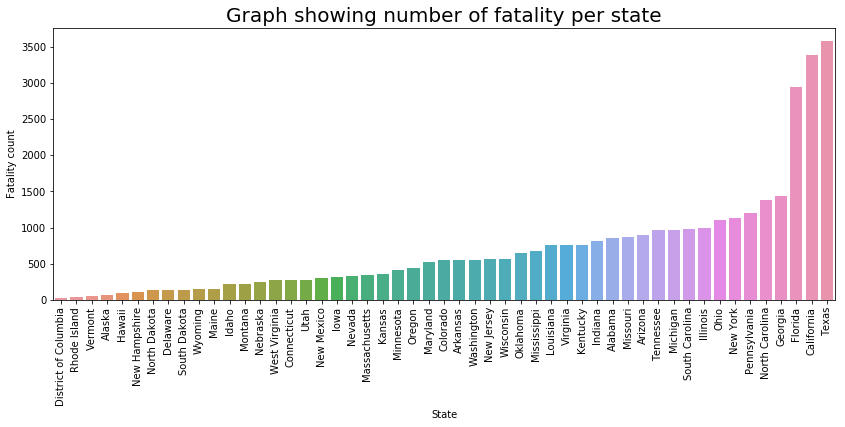

In [83]:
fatality_per_state = df.loc[:, ['state_name', 'no_of_victims']]
fatality_per_state = fatality_per_state.groupby(['state_name'])['no_of_victims'].sum().reset_index().sort_values('no_of_victims')

# Plotting using Seaborn
plt.figure(figsize=(14,5))
g = sns.barplot(x= "state_name", y = "no_of_victims", data = fatality_per_state)
state_name_list = pd.Series.tolist(fatality_per_state['state_name'])
y_pos = np.arange(len(state_name_list))
plt.xticks(y_pos, state_name_list, rotation='vertical')
plt.xlabel('State')
plt.ylabel('Fatality count')
g.axes.set_title('Graph showing number of fatality per state',fontsize=20)

## What do we see here
- Texas, California and Florida are the top 3 states that have the highest fatality. 
    * A huge number of retirees stay at Florida and a huge proportion of accidents is attributed to the elderly drivers.
    * As for the other states, there are no particular reasons that resulted in what was observed.
    

# Fatalities per day of the week

Text(0.5, 1.0, 'Graph showing number of fatality per day of week')

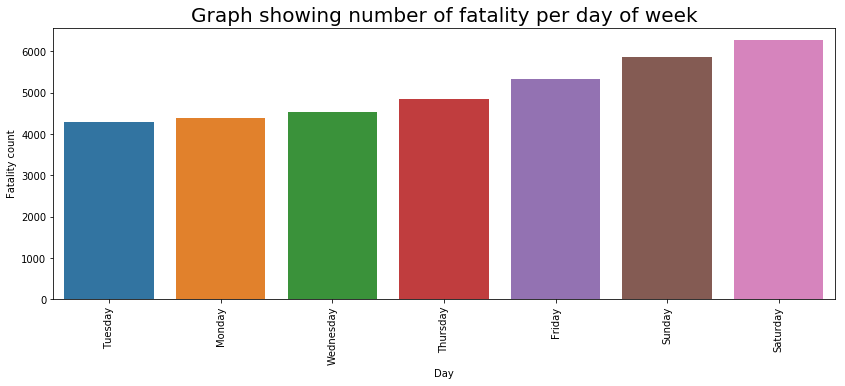

In [84]:
fatality_per_week = df.loc[:, ['day_of_week', 'no_of_victims']]
fatality_per_week = fatality_per_week.groupby(['day_of_week'])['no_of_victims'].sum().reset_index().sort_values("no_of_victims")

# Plotting using Seaborn
plt.figure(figsize=(14,5))
g = sns.barplot(x= "day_of_week", y = "no_of_victims", data = fatality_per_week)
week_name_list = pd.Series.tolist(fatality_per_week['day_of_week'])
y_pos = np.arange(len(week_name_list))
plt.xticks(y_pos, week_name_list, rotation='vertical')
plt.xlabel('Day')
plt.ylabel('Fatality count')
g.axes.set_title('Graph showing number of fatality per day of week',fontsize=20)

## What can we see here?
- Fatality rate seems to increase as the day progress along the week, with Saturday and Sunday being the top 2.
- As majority of the people do not need to work on weekends, the number of people that travel by car will increase. This leads to a higher possible chance of getting into a traffic accident. 

# Fatality per hour of day 

Text(0.5, 1.0, 'Graph showing number of fatality per hour of day')

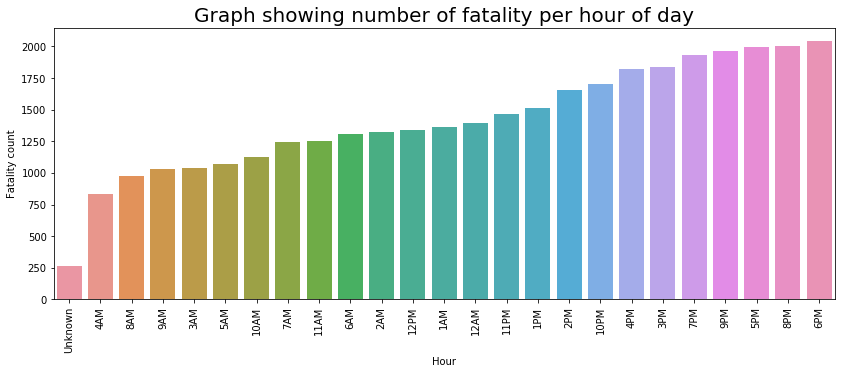

In [85]:
fatality_per_year = df.loc[:, ['hour_of_day', 'no_of_victims']]
fatality_per_day = fatality_per_day.groupby(['hour_of_day'])['no_of_victims'].sum().reset_index().sort_values("no_of_victims")

# Plotting using Seaborn
plt.figure(figsize=(14,5))
g = sns.barplot(x= "hour_of_day", y = "no_of_victims", data = fatality_per_day)
day_name_list = pd.Series.tolist(fatality_per_day['hour_of_day'])
y_pos = np.arange(len(day_name_list))
plt.xticks(y_pos, day_name_list, rotation='vertical')
plt.xlabel('Hour')
plt.ylabel('Fatality count')
g.axes.set_title('Graph showing number of fatality per hour of day',fontsize=20)

## What do we see here?
- The number of fatalities seem to aggregate between 5 PM to 9 PM. This seems to be the peak hour period where majority of the people are going home from work. Also, it is the time where the sun set. The reduced visibility can increase the occurance of accidents.

# Fatality per month of year

Text(0.5, 1.0, 'Graph showing number of fatality per month of year')

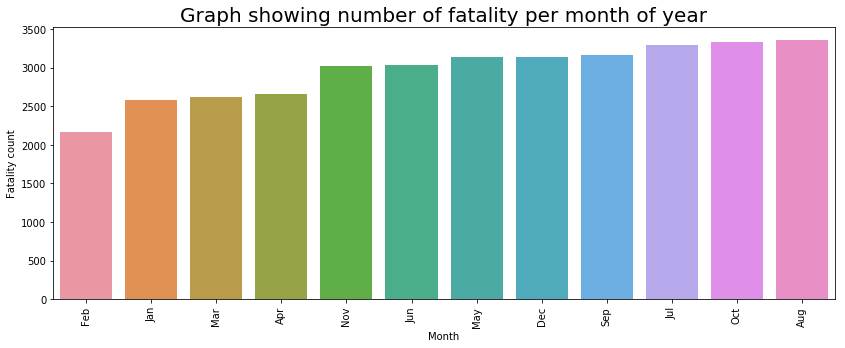

In [86]:
fatality_per_year = df.loc[:, ['month_of_year', 'no_of_victims']]
fatality_per_year = fatality_per_year.groupby(['month_of_year'])['no_of_victims'].sum().reset_index().sort_values("no_of_victims")

# Plotting using Seaborn
plt.figure(figsize=(14,5))
g = sns.barplot(x= "month_of_year", y = "no_of_victims", data = fatality_per_year)
year_name_list = pd.Series.tolist(fatality_per_year['month_of_year'])
y_pos = np.arange(len(year_name_list))
plt.xticks(y_pos, year_name_list, rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Fatality count')
g.axes.set_title('Graph showing number of fatality per month of year',fontsize=20)

## What do we see here?
- The first quarter of the year seems to have the least amount of fatality. The remaining period shows high fatality counts. 
- There seem to be no particular reason for this to happen as this can differs every year. 

# Fatality on light condition 

Text(0.5, 1.0, 'Graph showing number of fatality per light condition')

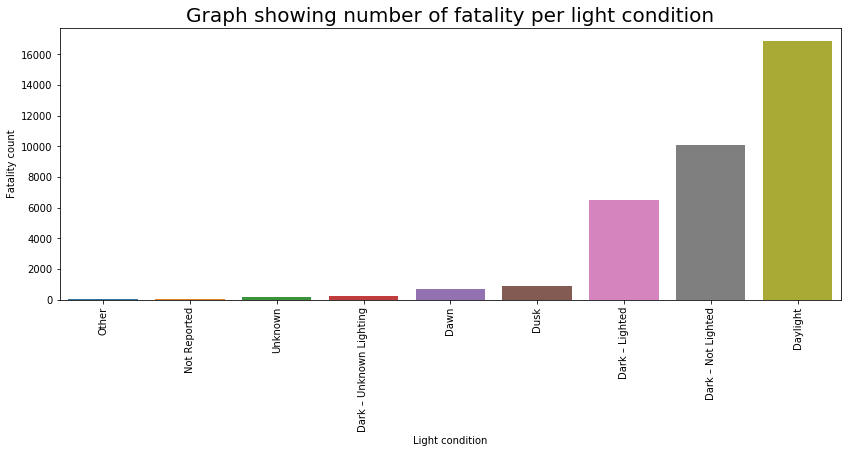

In [87]:
fatality_light_condition = df.loc[:, ['light_condition', 'no_of_victims']]
fatality_light_condition = fatality_light_condition.groupby(['light_condition'])['no_of_victims'].sum().reset_index().sort_values("no_of_victims")

# Plotting using Seaborn
plt.figure(figsize=(14,5))
g = sns.barplot(x= "light_condition", y = "no_of_victims", data = fatality_light_condition)
light_cond = pd.Series.tolist(fatality_light_condition['light_condition'])
y_pos = np.arange(len(light_cond))
plt.xticks(y_pos, light_cond, rotation='vertical')
plt.xlabel('Light condition')
plt.ylabel('Fatality count')
g.axes.set_title('Graph showing number of fatality per light condition',fontsize=20)

## What do we see here?
- Contrary to what I assumed, the number of fatality seem be the highest during daytime. What I can assume here is that more people tend to drive when there is daylight, hence, there is a higher occurance of accident. 

# Fatality on atmospheric_condition

Text(0.5, 1.0, 'Graph showing number of fatality per atmospheric condition')

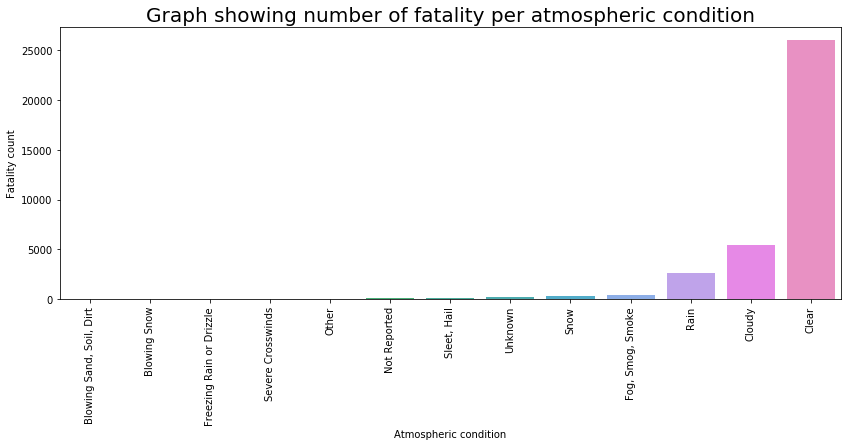

In [88]:
fatality_atmospheric_condition = df.loc[:, ['atmospheric_condition', 'no_of_victims']]
fatality_atmospheric_condition = fatality_atmospheric_condition.groupby(['atmospheric_condition'])['no_of_victims'].sum().reset_index().sort_values("no_of_victims")

# Plotting using Seaborn
plt.figure(figsize=(14,5))
g = sns.barplot(x= "atmospheric_condition", y = "no_of_victims", data = fatality_atmospheric_condition)
atmospheric_cond = pd.Series.tolist(fatality_atmospheric_condition['atmospheric_condition'])
y_pos = np.arange(len(atmospheric_cond))
plt.xticks(y_pos, atmospheric_cond, rotation='vertical')
plt.xlabel('Atmospheric condition')
plt.ylabel('Fatality count')
g.axes.set_title('Graph showing number of fatality per atmospheric condition',fontsize=20)

### What do we see here?
- In contrary to what was expected, what I can say about this is that some states may have a longer period of sunlight, which is why we have more fatality count in clear condition.

# Summary
- We observed high fatality on the last three days of the week and majority of the accident occurs between 5PM to 9PM. The main reason being people has a higher tendency to travel during that period, resulting in a higher occurance of accident. 
- The top 3 states to have the highest fatality are Texas, Califonia and Florida. 